<a href="https://colab.research.google.com/github/HSaurabh0919/epsil/blob/main/Finance/gbm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Reference: https://github.com/shashankvemuri/Finance

In [ ]:
!pip install yahoo-fin

In [ ]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

In [ ]:
import yahoo_fin.stock_info as si
from pandas_datareader import DataReader
import pandas as pd
import datetime
from pylab import rcParams
from yahoo_fin import stock_info as si
import matplotlib.pyplot as plt
import numpy as np
import math


In [15]:

num_of_years = 2
start_date = datetime.datetime.now() - datetime.timedelta(days=int(355.25*5))
end_date = datetime.date.today()

#stock = 'NIO'
#index = '^GSPC'
stock = 'TATAMOTORS.NS'
index = 'SETFNIF50.NS'

df = DataReader(stock,'yahoo', start_date, end_date)
dfb = DataReader(index,'yahoo', start_date, end_date)

rts = df.resample('M').last()
rbts = dfb.resample('M').last()
dfsm = pd.DataFrame({'s_adjclose' : rts['Adj Close'],
                        'b_adjclose' : rbts['Adj Close']},
                        index=rts.index)

dfsm[['s_returns','b_returns']] = dfsm[['s_adjclose','b_adjclose']]/\
    dfsm[['s_adjclose','b_adjclose']].shift(1) -1
dfsm = dfsm.dropna()
covmat = np.cov(dfsm["s_returns"],dfsm["b_returns"])



In [16]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-08-28,387.399994,378.299988,385.850006,379.299988,4403872,379.299988
2017-08-29,382.350006,374.450012,379.000000,376.100006,4689547,376.100006
2017-08-30,382.750000,377.450012,380.850006,378.500000,3734824,378.500000
2017-08-31,380.450012,375.799988,380.049988,376.549988,4685511,376.549988
2017-09-01,392.850006,378.649994,379.350006,390.850006,7380325,390.850006


In [17]:
dfb.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-08-28,78.849998,78.849998,78.849998,78.849998,0,78.849998
2017-08-29,78.849998,78.849998,78.849998,78.849998,0,78.849998
2017-08-30,78.849998,78.849998,78.849998,78.849998,0,78.849998
2017-08-31,78.849998,78.849998,78.849998,78.849998,0,78.849998
2017-09-01,78.849998,78.849998,78.849998,78.849998,0,78.849998


In [18]:
dfsm.head()

,s_adjclose,b_adjclose,s_returns,b_returns
Date,,,,
2017-09-30,401.500000,78.849998,0.066259,0.0
2017-10-31,428.399994,78.849998,0.066999,0.0
2017-11-30,404.149994,78.849998,-0.056606,0.0
2017-12-31,431.850006,78.849998,0.068539,0.0
2018-01-31,399.500000,78.849998,-0.074910,0.0


In [19]:
class GBM:
    def __init__(self, initial_price, drift, volatility, time_period, total_time):
        # Initialize fields
        self.initial_price = initial_price
        self.current_price = initial_price
        self.drift = drift
        self.volatility = volatility
        self.time_period = time_period
        self.total_time = total_time
        self.prices = []
        self.simulate()   # Simulate the diffusion proces

    def simulate(self):
        while(self.total_time > 0):
            dS = self.current_price*self.drift*self.time_period + self.current_price*self.volatility*np.random.normal(0, math.sqrt(self.time_period))
            self.prices.append(self.current_price + dS)
            self.current_price += dS
            self.total_time -= self.time_period




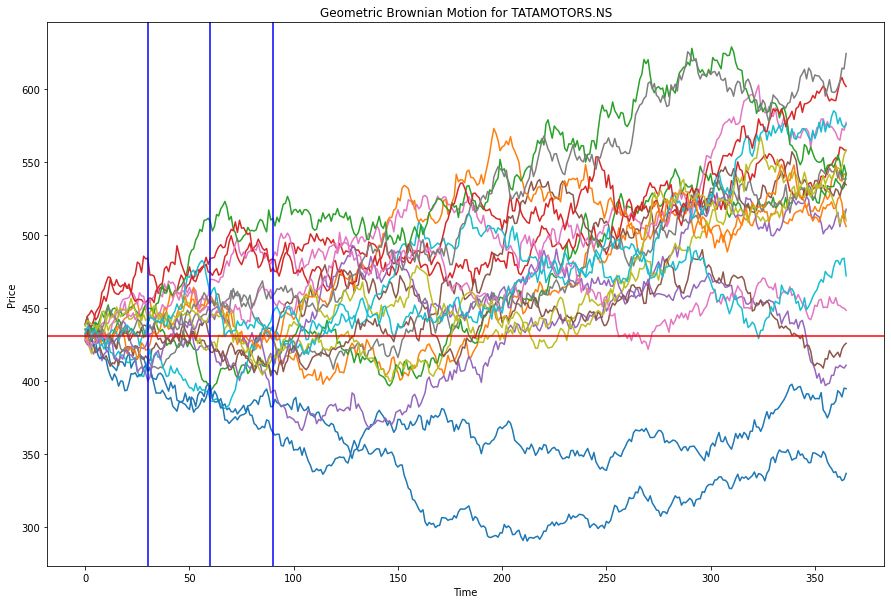

In [22]:
simulations = []
n = 20
initial_price = si.get_live_price(stock)
drift = .24
volatility = np.sqrt(covmat[0,0])
time_period = 1/365 # Daily
total_time = 1

for i in range(0, n):
    simulations.append(GBM(initial_price, drift, volatility, time_period, total_time))

#Plot the result
rcParams['figure.figsize'] = 15, 10 
for sim in simulations:
    plt.plot(np.arange(0, len(sim.prices)), sim.prices)

plt.title(f'Geometric Brownian Motion for {stock.upper()}')
plt.axhline(y=si.get_live_price(stock), color='r')
plt.axvline(x=30, color='b')
plt.axvline(x=60, color='b')
plt.axvline(x=90, color='b')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

In [27]:
#Let's try to find average values
data_30 = list()
data_60 = list()
data_90 = list()
for i in range(0,n):
  data_30.append(simulations[i].prices[30])
  data_60.append(simulations[i].prices[60])
  data_90.append(simulations[i].prices[90])


In [31]:
avg_30 = np.array(data_30).mean()
avg_60 = np.array(data_60).mean()
avg_90 = np.array(data_90).mean()

In [32]:
print(avg_30,"",avg_60,"",avg_90)

434.11108130124467  440.88067949400937  433.7398013506033


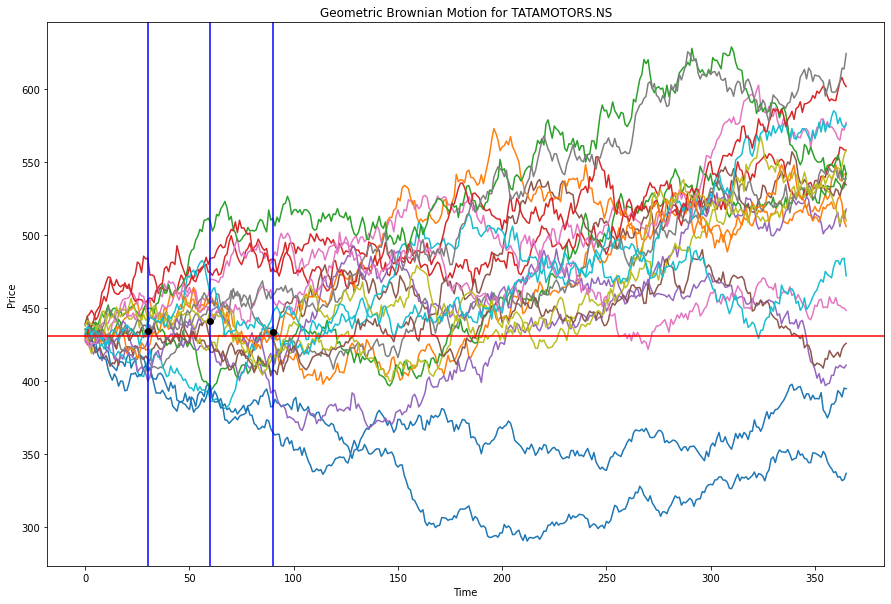

In [37]:
#Plot the result
rcParams['figure.figsize'] = 15, 10 
for sim in simulations:
    plt.plot(np.arange(0, len(sim.prices)), sim.prices)
plt.title(f'Geometric Brownian Motion for {stock.upper()}')
plt.axhline(y=si.get_live_price(stock), color='r')
plt.axvline(x=30, color='b')
plt.axvline(x=60, color='b')
plt.axvline(x=90, color='b')
plt.xlabel('Time')
plt.ylabel('Price')
plt.plot((30), (avg_30), 'o', color='k')
plt.plot((60), (avg_60), 'o', color='k')
plt.plot((90), (avg_90), 'o', color='k')
plt.show()
